Regresion Logística con Keras

En este ejercicio, tu objetivo será entrenar modelos de Regresión Logística utilizando Keras (y Tensorflow como backend) para familiarizarte con la librería.



In [1]:
%matplotlib notebook

In [2]:
import matplotlib.pyplot as plt
import rnutil

rnutil: Los archivos de los conjuntos de datos que ofrece este paquete también están disponibles en https://github.com/facundoq/redes-neuronales-util/tree/main/rnutil/data para descargar de forma individual
rnutil: Agregando el parámetro local=True en las funciones rnutil.load_dataset_numpy, rnutil.load_dataset_pandas y rnutil.load_image se puede cargar una versión local de un archivo en lugar de la versión que ofrece este paquete.


# Entrena un modelo de Regresión Logística con Keras para varios datasets



Podés elegir el dataset comentando/descomentando las líneas 9 a 17. Comentá todos los datasets salvo el que quieras usar.

Intenta obtener una buena performance en todos los casos. Prueba activando o no la normalización (últimas líneas) ¿Qué datasets no puede aprender el modelo?

In [3]:
import numpy as np

# Selección del dataset; descomenta el que quieras usar
# Datasets en 2D
dataset = "2_clases_simple.csv"
#dataset = "6_clases_dificil.csv"
#dataset = "moons.csv"
#dataset = "moons_mis-scaled.csv"
# dataset = "circulos.csv"

# Dataset con más de 2 dimensiones
# dataset = "iris.csv"
# dataset = "diabetes.csv"

# Carga del dataset

data=rnutil.load_dataset_numpy(dataset)
x,y=data[:,0:-1],data[:,-1]
# cantidad de ejemplos y dimension de entrada
n,d_in=x.shape
# calcula la cantidad de clases
classes=int(y.max()+1)

print("Información del conjunto de datos:")
print(f"Ejemplos: {n}")
print(f"Variables de entrada: {d_in}")
print(f"Cantidad de clases: {classes}")

# Normalizo las variables de entrada
for i in range(d_in):
    x[:,i]=(x[:,i]-x[:,i].mean())/x[:,i].std()

Loading file from package rnutil (/home/adrian/.conda/envs/rn/lib/python3.10/site-packages/rnutil/data)...
Done


Información del conjunto de datos:

Ejemplos: 1000

Variables de entrada: 2

Cantidad de clases: 2

Inicialización aleatoria del modelo (podes volver a correr esta celda para obtener otros 
resultados)

2022-04-06 19:40:01.048997: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-06 19:40:01.065572: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-06 19:40:01.065671: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-06 19:40:01.066040: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

<IPython.core.display.Javascript object>


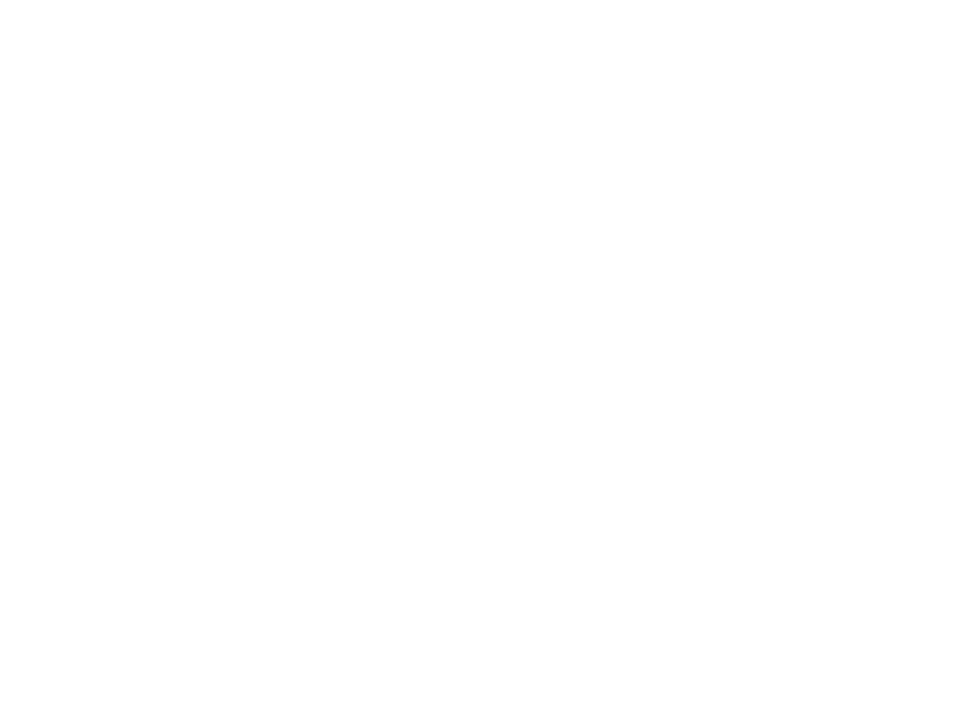

2022-04-06 19:40:01.640753: E tensorflow/stream_executor/cuda/cuda_blas.cc:232] failed to create cublas handle: CUBLAS_STATUS_NOT_INITIALIZED
2022-04-06 19:40:01.640781: E tensorflow/stream_executor/cuda/cuda_blas.cc:234] Failure to initialize cublas may be due to OOM (cublas needs some free memory when you initialize it, and your deep-learning framework may have preallocated more than its fair share), or may be because this binary was not built with support for the GPU in your machine.
2022-04-06 19:40:01.640797: W tensorflow/core/framework/op_kernel.cc:1745] OP_REQUIRES failed at matmul_op_impl.h:438 : INTERNAL: Attempting to perform BLAS operation using StreamExecutor without BLAS support


InternalError: Graph execution error:

Detected at node 'sequential/dense/MatMul' defined at (most recent call last):
    File "/home/adrian/.conda/envs/rn/lib/python3.10/runpy.py", line 196, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "/home/adrian/.conda/envs/rn/lib/python3.10/runpy.py", line 86, in _run_code
      exec(code, run_globals)
    File "/home/adrian/.conda/envs/rn/lib/python3.10/site-packages/ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "/home/adrian/.conda/envs/rn/lib/python3.10/site-packages/traitlets/config/application.py", line 846, in launch_instance
      app.start()
    File "/home/adrian/.conda/envs/rn/lib/python3.10/site-packages/ipykernel/kernelapp.py", line 707, in start
      self.io_loop.start()
    File "/home/adrian/.conda/envs/rn/lib/python3.10/site-packages/tornado/platform/asyncio.py", line 199, in start
      self.asyncio_loop.run_forever()
    File "/home/adrian/.conda/envs/rn/lib/python3.10/asyncio/base_events.py", line 600, in run_forever
      self._run_once()
    File "/home/adrian/.conda/envs/rn/lib/python3.10/asyncio/base_events.py", line 1896, in _run_once
      handle._run()
    File "/home/adrian/.conda/envs/rn/lib/python3.10/asyncio/events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "/home/adrian/.conda/envs/rn/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 502, in dispatch_queue
      await self.process_one()
    File "/home/adrian/.conda/envs/rn/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 491, in process_one
      await dispatch(*args)
    File "/home/adrian/.conda/envs/rn/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 398, in dispatch_shell
      await result
    File "/home/adrian/.conda/envs/rn/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 722, in execute_request
      reply_content = await reply_content
    File "/home/adrian/.conda/envs/rn/lib/python3.10/site-packages/ipykernel/ipkernel.py", line 389, in do_execute
      res = shell.run_cell(code, store_history=store_history, silent=silent)
    File "/home/adrian/.conda/envs/rn/lib/python3.10/site-packages/ipykernel/zmqshell.py", line 528, in run_cell
      return super().run_cell(*args, **kwargs)
    File "/home/adrian/.conda/envs/rn/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 2863, in run_cell
      result = self._run_cell(
    File "/home/adrian/.conda/envs/rn/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 2909, in _run_cell
      return runner(coro)
    File "/home/adrian/.conda/envs/rn/lib/python3.10/site-packages/IPython/core/async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "/home/adrian/.conda/envs/rn/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3106, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "/home/adrian/.conda/envs/rn/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3309, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "/home/adrian/.conda/envs/rn/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3369, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "/var/tmp/ipykernel_401919/2823078917.py", line 13, in <cell line: 12>
      rnutil.plot_fronteras_keras(modelo,x,y,title=f"Modelo inicial",detail=0.05)
    File "/home/adrian/.conda/envs/rn/lib/python3.10/site-packages/rnutil/plot_classification.py", line 20, in plot_fronteras_keras
      Z = modelo.predict(Z)
    File "/home/adrian/.conda/envs/rn/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "/home/adrian/.conda/envs/rn/lib/python3.10/site-packages/keras/engine/training.py", line 2033, in predict
      tmp_batch_outputs = self.predict_function(iterator)
    File "/home/adrian/.conda/envs/rn/lib/python3.10/site-packages/keras/engine/training.py", line 1845, in predict_function
      return step_function(self, iterator)
    File "/home/adrian/.conda/envs/rn/lib/python3.10/site-packages/keras/engine/training.py", line 1834, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/home/adrian/.conda/envs/rn/lib/python3.10/site-packages/keras/engine/training.py", line 1823, in run_step
      outputs = model.predict_step(data)
    File "/home/adrian/.conda/envs/rn/lib/python3.10/site-packages/keras/engine/training.py", line 1791, in predict_step
      return self(x, training=False)
    File "/home/adrian/.conda/envs/rn/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "/home/adrian/.conda/envs/rn/lib/python3.10/site-packages/keras/engine/training.py", line 490, in __call__
      return super().__call__(*args, **kwargs)
    File "/home/adrian/.conda/envs/rn/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "/home/adrian/.conda/envs/rn/lib/python3.10/site-packages/keras/engine/base_layer.py", line 1014, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "/home/adrian/.conda/envs/rn/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 92, in error_handler
      return fn(*args, **kwargs)
    File "/home/adrian/.conda/envs/rn/lib/python3.10/site-packages/keras/engine/sequential.py", line 374, in call
      return super(Sequential, self).call(inputs, training=training, mask=mask)
    File "/home/adrian/.conda/envs/rn/lib/python3.10/site-packages/keras/engine/functional.py", line 458, in call
      return self._run_internal_graph(
    File "/home/adrian/.conda/envs/rn/lib/python3.10/site-packages/keras/engine/functional.py", line 596, in _run_internal_graph
      outputs = node.layer(*args, **kwargs)
    File "/home/adrian/.conda/envs/rn/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "/home/adrian/.conda/envs/rn/lib/python3.10/site-packages/keras/engine/base_layer.py", line 1014, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "/home/adrian/.conda/envs/rn/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 92, in error_handler
      return fn(*args, **kwargs)
    File "/home/adrian/.conda/envs/rn/lib/python3.10/site-packages/keras/layers/core/dense.py", line 221, in call
      outputs = tf.matmul(a=inputs, b=self.kernel)
Node: 'sequential/dense/MatMul'
Attempting to perform BLAS operation using StreamExecutor without BLAS support
	 [[{{node sequential/dense/MatMul}}]] [Op:__inference_predict_function_111]

In [4]:
from tensorflow import keras

# Creación del modelo inicial
print("Inicialización aleatoria del modelo (podes volver a correr esta celda para obtener otros resultados)")

# Creo un modelo logístico
modelo = keras.Sequential([
    # la activación softmax hace que la salida sean probabilidades
    keras.layers.Dense(classes,input_shape=(d_in,), activation='softmax')])

# visualización del modelo inicial (si hay solo 2 variables de entrada)
if d_in==2:
    rnutil.plot_fronteras_keras(modelo,x,y,title=f"Modelo inicial",detail=0.05)



modelo.compile(
  optimizer=keras.optimizers.SGD(learning_rate=0.001), 
  loss='sparse_categorical_crossentropy', 
  # metricas para ir calculando en cada iteracion o batch 
  # Agregamos el accuracy del modelo
  metrics=['accuracy'], 
)

# Entrenamiento del modelo
history = modelo.fit(x,y,epochs=100,batch_size=16,verbose=False)
rnutil.plot_loss_accuracy_keras(history)

# visualización del modelo final (si hay solo 2 variables de entrada)
if d_in==2:
    rnutil.plot_fronteras_keras(modelo,x,y,title=f"Modelo Final",detail=0.05)